### The Division Algorithm

Let $a$ and $b$ be integers, with $b > 0$. Then there exist unique integers $q$ and $r$ such that $$ a = bq + r$$ where $0 \leq r < b$

*(T. Judson) Theorem 2.9*


Let $a$ and $b$ be nonzero intigers than ther exists intigers $r$ and $s$ such that, $$gcd(a,b) = ar + bs.$$ Furthermore, the GCD of $a$ and $b$ is unique.

*(T. Judson) Theorem 2.10*



### Euclidean Algorithm

One can compute the GCD of two intigers $a$ and $b$, using the algorithm as follows. 

Repeat divisions in the form of the division algorithm: 

$$ b = aq_1 + r_1 $$

You take the remainder of a division, then use that remainder to divide the previous divisor. You keep going until the remainder is zero. The last non-zero remainder is your GCD ($d$). This will result a decreasing sequence of positive integers $r_1 > r_2 > \dots > r_n = d$; that is,$$\begin{aligned}
a &= r_1q_2 + r_2 \\
r_1 &= r_2q_3 + r_3 \\
&\vdots \\
r_{n-2} &= r_{n-1}q_n + r_n \\
r_{n-1} &= r_nq_{n+1}
\end{aligned}$$


##### Bézout's Identity
The GCD of two numbers and express that GCD as a linear combination of the original numbers is known as Bézout's Identity. To find the numbers $r$ and $s$ (as written in theorem 2.10), begin by reversing the algorithm.

Take the last equation and substitute results obtained from the previous equations:$$\begin{aligned}
d &= r_n \\
&= r_{n-2} - r_{n-1}q_n \\
&= r_{n-2} - q_n(r_{n-3} - q_{n-1}r_{n-2}) \\
&= -q_nr_{n-3} + (1 + q_nq_{n-1})r_{n-2} \\
&\vdots \\
&= ra + sb
\end{aligned}$$

*(T. Judson) 2.12*


In [3]:
def division_algorithm(a: int, b: int):
    if b <= 0:
        raise ValueError("b must be a positive integer")

    q = a // b
    r = a % b
    return q, r


a, b = 107, 23
q, r = division_algorithm(a, b)
print(f"{a} = {b}*{q} + {r}")

107 = 23*4 + 15


In [4]:
def euclidean_algorithm(a: int, b: int):
    steps = []

    a, b = abs(a), abs(b)
    while b != 0:
        q = a // b
        r = a % b
        steps.append((a, b, q, r))
        a, b = b, r

    return a, steps

gcd_value, steps = euclidean_algorithm(252, 198)

for a, b, q, r in steps:
    print(f"{a} = {b}*{q} + {r}")

print("gcd =", gcd_value)


252 = 198*1 + 54
198 = 54*3 + 36
54 = 36*1 + 18
36 = 18*2 + 0
gcd = 18


Below is a cool tiling visual representation of the steps in a euclidan algorithm.

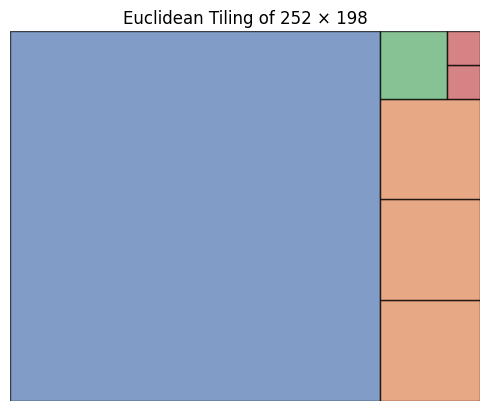

In [10]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def euclidean_tiling(a, b):
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.set_xlim(0, a)
    ax.set_ylim(0, b)
    ax.set_title(f"Euclidean Tiling of {a} × {b}")

    x, y = 0, 0
    horizontal = True
    colors = ['#4C72B0', '#DD8452', '#55A868', '#C44E52', '#8172B3']
    color_index = 0

    while a != 0 and b != 0:
        if horizontal:
            q = a // b
            for _ in range(q):
                square = Rectangle(
                    (x, y), b, b,
                    facecolor=colors[color_index % len(colors)],
                    edgecolor='black',
                    alpha=0.7
                )
                ax.add_patch(square)
                x += b
            a = a % b
        else:
            q = b // a
            for _ in range(q):
                square = Rectangle(
                    (x, y), a, a,
                    facecolor=colors[color_index % len(colors)],
                    edgecolor='black',
                    alpha=0.7
                )
                ax.add_patch(square)
                y += a
            b = b % a

        horizontal = not horizontal
        color_index += 1

    ax.axis('off')
    plt.show()

euclidean_tiling(252, 198)

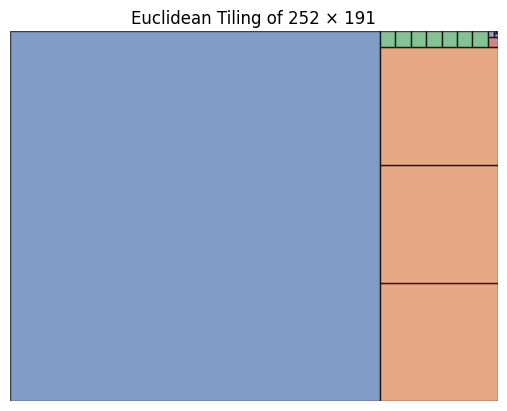

In [50]:
euclidean_tiling(252, 191)

### Definition Modulo 
For an integer $a$ and a positive integer $m$, $a \pmod m$ is the remainder $r$ such that $a = qm + r$ where $0 \le r < m$.

### Key properties

If $a \equiv b \pmod m$ and $c \equiv d \pmod m$, 

then: 
- $a + c \equiv b + d \pmod m$ 
- $ac \equiv bd \pmod m$ 

This implies:
- $a + k \equiv b + k \pmod m$ 
- $ak \equiv bk \pmod m$ 
- $a^k \equiv b^k \pmod m$
- $k(a+c) \equiv ka + kc \mod m$

In a set of the equivalence classes of the integers mod n satisfy the commutative; associative; distributive property; and existence of identities, all under multiplication and addition. There exists an additive inverse, and a multiplicative inverse for any nonzero element. 

*(T. Judson) Proposition 3.4*

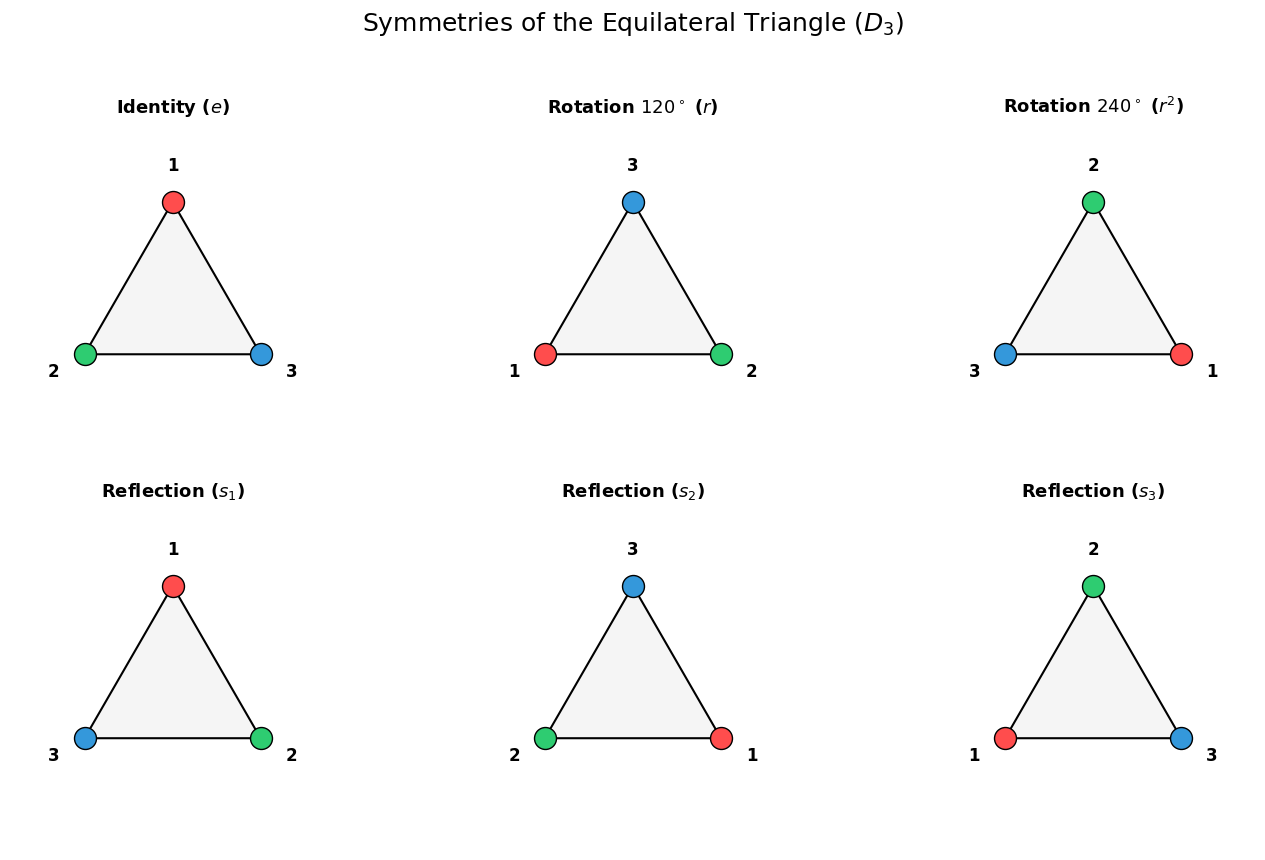

In [27]:
import matplotlib.pyplot as plt
import numpy as np

def draw_colored_triangle(ax, permutation, title):
    coords = np.array([
        [0, 1],              
        [-np.sqrt(3)/2, -0.5], 
        [np.sqrt(3)/2, -0.5]  
    ])
    
    colors = ['#ff4d4d', '#2ecc71', '#3498db']
    labels = ["1", "2", "3"]
    
    poly = plt.Polygon(coords, closed=True, color='whitesmoke', ec='black', lw=1.5, zorder=1)
    ax.add_patch(poly)
    
    for i in range(3):
        idx = permutation[i]
        x, y = coords[i]
        
        ax.scatter(x, y, color=colors[idx], s=250, zorder=3, edgecolors='black')
        ax.text(x * 1.35, y * 1.35, labels[idx], fontsize=12, 
                ha='center', va='center', fontweight='bold', color='black')
        
    ax.set_title(title, fontsize=13, pad=20, fontweight='bold')
    ax.set_xlim(-1.6, 1.6)
    ax.set_ylim(-1.6, 1.6)
    ax.set_aspect('equal')
    ax.axis('off')

symmetries = [
    ((0, 1, 2), r"Identity ($e$)"),
    ((2, 0, 1), r"Rotation $120^\circ$ ($r$)"),
    ((1, 2, 0), r"Rotation $240^\circ$ ($r^2$)"),
    ((0, 2, 1), r"Reflection ($s_1$)"),
    ((2, 1, 0), r"Reflection ($s_2$)"),
    ((1, 0, 2), r"Reflection ($s_3$)")
]

fig, axes = plt.subplots(2, 3, figsize=(14, 9))
axes = axes.flatten()

for i, (perm, name) in enumerate(symmetries):
    draw_colored_triangle(axes[i], perm, name)

plt.suptitle("Symmetries of the Equilateral Triangle ($D_3$)", fontsize=18, y=0.98)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Deep Dive: Modular Geometry

When we visualize the mapping $x \mapsto (ax \pmod n)$, we are actually seeing the structure of the cyclic subgroups within the modular system. Patterns emerge because modular arithmetic is essentially sampling a continuous circle at discrete intervals.

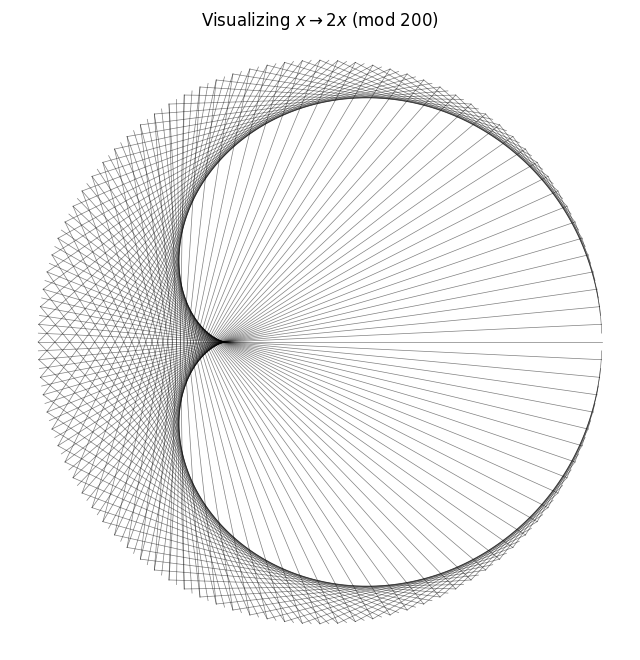

In [32]:
def draw_mod_star(n, multiplier):
    theta = np.linspace(0, 2*np.pi, n, endpoint=False)
    x = np.cos(theta)
    y = np.sin(theta)
    
    plt.figure(figsize=(8,8))
    for i in range(n):
        next_val = (i * multiplier) % n
        plt.plot([x[i], x[next_val]], [y[i], y[next_val]], color='black', lw=0.5, alpha=0.5)
    
    plt.axis('equal')
    plt.axis('off')
    
    # Using 'r' for raw string and '\to' + 'mod' for compatibility
    plt.title(fr"Visualizing $x \to {multiplier}x$ (mod ${n}$)")
    plt.show()

draw_mod_star(200, 2)

### Fermat's little theorem
Let $p$ be any prime number and suppose that $p \nmid a$ ($p$ does not divide $a$). Then:$$a^{p-1} \equiv 1 \pmod{p}$$Furthermore, for any integer $b$,$$b^p \equiv b \pmod{p}$$


*(T. Judson) Proposition 6.19*

Fermat's Little Theorem is a fundamental principle in number theory that describes a unique property of prime numbers.

The second portion simply states that raising a number to the $p$-th power and then taking the remainder modulo $p$ brings you right back to the original number.

I the visual below we can see that after $p-1$ steps we will always end up at postion 1, given we are working $mod p$ such that $p$ is prime.

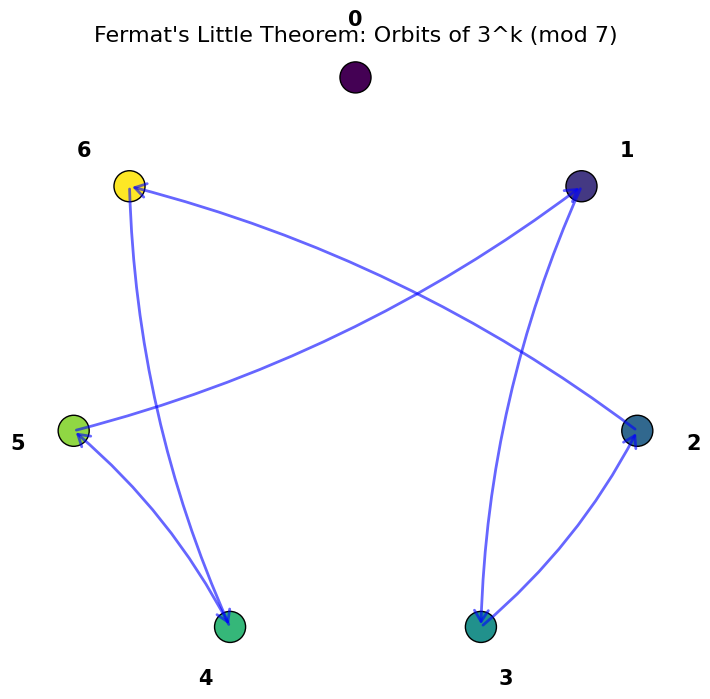

In [65]:
import matplotlib.pyplot as plt
import numpy as np

def draw_flt_orbit(p=7, a=3):
    fig, ax = plt.subplots(figsize=(8, 8))
    
    indices = np.arange(p)
    theta = np.linspace(0, 2*np.pi, p, endpoint=False)
    theta = np.pi/2 - theta
    
    x = np.cos(theta)
    y = np.sin(theta)
    
    # vertices
    colors = plt.cm.viridis(np.linspace(0, 1, p))
    ax.scatter(x, y, c=colors, s=500, edgecolors='black', zorder=3)
    
    for i in range(p):
        ax.text(x[i]*1.2, y[i]*1.2, str(i), fontsize=15, 
                ha='center', va='center', fontweight='bold')

    path = [1]
    current = 1
    for _ in range(p - 1):
        current = (current * a) % p
        path.append(current)
    
    for i in range(len(path)-1):
        start_node = path[i]
        end_node = path[i+1]
        
        ax.annotate("", xy=(x[end_node], y[end_node]), 
                    xytext=(x[start_node], y[start_node]),
                    arrowprops=dict(arrowstyle="->,head_width=0.5,head_length=0.8", 
                                  lw=2, color='blue', connectionstyle="arc3,rad=0.1",
                                  alpha=0.6))

    plt.title(f"Fermat's Little Theorem: Orbits of {a}^k (mod {p})", fontsize=16)

    ax.set_aspect('equal')
    ax.axis('off')
    plt.show()

draw_flt_orbit(7, 3)

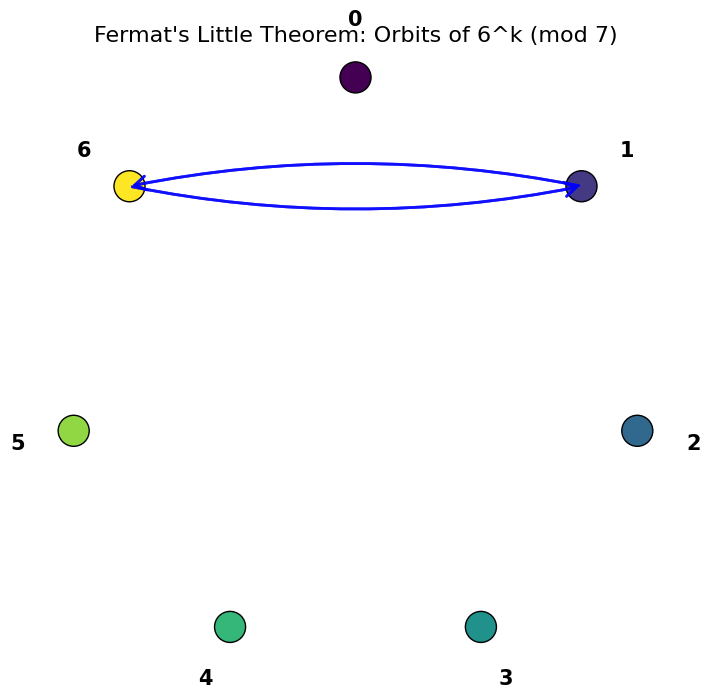

In [49]:
draw_flt_orbit(7, 6)

### Wilsons theorem
A positive integer $n > 1$ is a prime number if and only if:$$(n - 1)! \equiv -1 \pmod{n}$$

In modular arithmetic (modulo a prime $p$), every number between $1$ and $p-1$ has a "multiplicative inverse"—another number in that set that it can multiply with to equal $1$. Most numbers pair up and "cancel out" to $1$. The only numbers that don't have a different partner are $1$ and $p-1$ (which is $-1$).

For example, in modulo $7$:

$(7-1)! = 1 \cdot (2 \cdot 4) \cdot (3 \cdot 5) \cdot 6 $

$2 \cdot 4 = 8 \equiv 1 \pmod 7$

$3 \cdot 5 = 15 \equiv 1 \pmod 7$ 

So, $(7-1)! \equiv 1 \cdot 1 \cdot 1 \cdot 6 \equiv 6 \equiv -1 \pmod 7$.

##### Euler's Phi Function
For a positive integer $n$, the Euler phi function $\phi(n)$ is the number of positive integers $x$ in the range $1 \le x \le n$ such that $\gcd(x, n) = 1$.
If the prime factorization of $n$ is $n = p_1^{k_1} p_2^{k_2} \dots p_m^{k_m}$, then:$$\phi(n) =  n \prod_{p|n} (1- \frac{1}{p}) = n \left(1 - \frac{1}{p_1}\right) \left(1 - \frac{1}{p_2}\right) \dots \left(1 - \frac{1}{p_m}\right)$$

### Euler's theorem 
 Let $a$ and $n$ be coprime positive integers. Then:$$a^{\phi(n)} \equiv 1 \pmod{n}$$ 

*(T. Judson) Proposition 6.18*

We trace the orbit of $a^k \pmod n$ to show that it only visits the coprime numbers and returns to 1 after $\phi(n)$ steps (or a divisor of it).

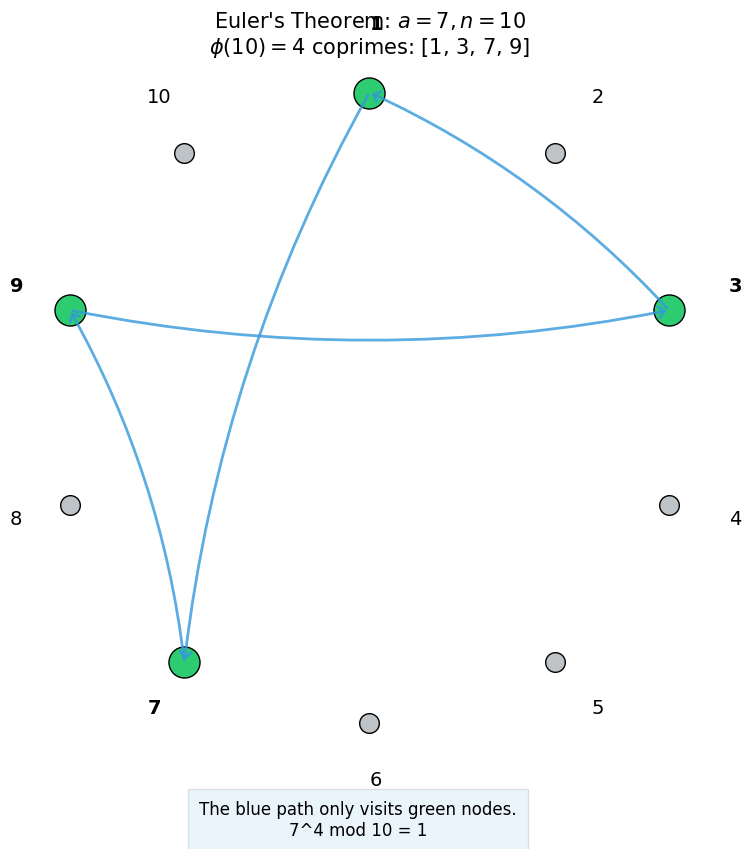

In [73]:
import matplotlib.pyplot as plt
import numpy as np
import math

def visualize_euler(n=10, a=3):
    coprimes = [i for i in range(1, n + 1) if math.gcd(i, n) == 1]
    phi_n = len(coprimes)
    
    fig, ax = plt.subplots(figsize=(9, 9))
    
    theta = np.linspace(0, 2*np.pi, n, endpoint=False)
    theta = np.pi/2 - theta 
    
    x = np.cos(theta)
    y = np.sin(theta)
    
    for i in range(1, n + 1):
        idx = i - 1
        is_coprime = i in coprimes
        color = '#2ecc71' if is_coprime else '#bdc3c7'
        size = 500 if is_coprime else 200
        
        ax.scatter(x[idx], y[idx], c=color, s=size, edgecolors='black', zorder=3)
        ax.text(x[idx]*1.2, y[idx]*1.2, str(i), fontsize=14, 
                fontweight='bold' if is_coprime else 'normal')

    path = [1]
    current = 1
    for _ in range(phi_n):
        current = (current * a) % n
        path.append(current)
        
    for i in range(len(path)-1):
        start_node = path[i] - 1
        end_node = path[i+1] - 1
        
        if path[i+1] == 0: end_node = n - 1 
        
        ax.annotate("", xy=(x[end_node], y[end_node]), 
                    xytext=(x[start_node], y[start_node]),
                    arrowprops=dict(arrowstyle="->,head_width=0.4", 
                                  lw=2, color='#3498db', connectionstyle="arc3,rad=0.1",
                                  alpha=0.8))

    plt.title(f"Euler's Theorem: $a={a}, n={n}$\n" + 
              rf"$\phi({n}) = {phi_n}$ coprimes: {coprimes}", fontsize=15)
    
    note = f"The blue path only visits green nodes.\n{a}^{phi_n} mod {n} = {pow(a, phi_n, n)}"
    plt.figtext(0.5, 0.02, note, ha="center", fontsize=12, 
                bbox={"facecolor":"#3498db", "alpha":0.1, "pad":8})

    ax.set_aspect('equal')
    ax.axis('off')
    plt.show()

visualize_euler(10, 7)

##### Distribution of Units

One of the most interesting aspects of the Totient function is how it fluctuates. While it generally increases, it "drops" significantly whenever $n$ is a highly composite number (like 12, 24, or 60) and "peaks" whenever $n$ is prime.

Conjecture to Test: For a prime number $p$, $\phi(p) = p - 1$.
Why? Because in a prime modulus, every number except zero is coprime to $p$, meaning every non-zero element is a unit.

<>:15: SyntaxWarning: invalid escape sequence '\p'
<>:15: SyntaxWarning: invalid escape sequence '\p'
/var/folders/v4/ll98xkld14g9tg5r1jjcr5j80000gn/T/ipykernel_98723/3893336812.py:15: SyntaxWarning: invalid escape sequence '\p'
  plt.title("The Euler Totient Function $\phi(n)$")


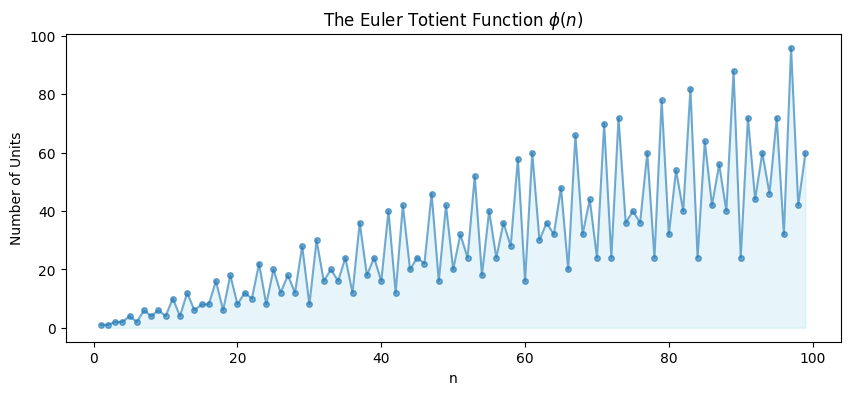

In [74]:
def phi(n):
    return sum(1 for k in range(1, n + 1) if gcd(k, n) == 1)

def gcd(a, b):
    while b: a, b = b, a % b
    return a

# Visualizing the 'Jaggedness' of the Totient Function
ns = range(1, 100)
phis = [phi(n) for n in ns]

plt.figure(figsize=(10, 4))
plt.plot(ns, phis, 'o-', markersize=4, alpha=0.6)
plt.fill_between(ns, phis, color="skyblue", alpha=0.2)
plt.title("The Euler Totient Function $\phi(n)$")
plt.xlabel("n")
plt.ylabel("Number of Units")
plt.show()

##### Leheme's conjecture
If $n$ is a composite number, then $\phi(n)$ cannot divide $n - 1$. $$\phi(n) \mid (n - 1) \iff n \text{ is prime}$$

also known as: "Lehmer's totient problem". My professor pressented this to us; that till this day it remains unproven. Interesting enough to add this in my notes... Lehmer’s Conjecture is essentially asking: "Can a composite number ever behave exactly like a prime number in the eyes of the Euler Phi function?"